In [1]:
import base64
import IPython
import os
import uuid
import glob
import re

In [2]:
os.chdir("c:/numbers_recognition/")

In [3]:
def save(data):
    fn = "files/"+str(uuid.uuid1()) + ".dat"
    with open(fn, "wb") as f:
        f.write(data)
    return fn

In [4]:
def dataset(file):
    label, gender, media = [], [], []
    with open(file, "r") as f:
        for line in f:
            l,g,m = line.split(',')
            label.append(l.strip())
            gender.append(g.strip())
            fn = save(base64.b64decode(m))
            media.append(fn)
    return label, gender, media

In [45]:
def ds_complete(file):
    label, gender, media = [], [], []
    with open(file, "r") as f:
        for line in f:
            l,g,m = line.split(',')
            label.append(l.strip())
            gender.append(g.strip())
            media.append(m.strip())
    return label, gender, media

Convert files in different formats to wav

```bash
for i in *.dat; 
  do name=`echo $i | cut -d'.' -f1`; 
  echo $name; 
  ffmpeg -i "$i" -acodec pcm_s16le -ac 1 -ar 16000 "wav/$name.wav";
done;
```

In [10]:
l, g, m = dataset("dataset/1.csv")

In [11]:
with open("dataset/1.completed.csv", "w") as f:

    for ll, gg, mm in list(zip(l,g, m)):
        # print(ll, gg, mm)
        f.write("{}, {}, {}\n".format(ll, gg, mm))

In [43]:
csv = glob.glob("dataset/*.completed.csv");

In [52]:
file_to_class = {}
uuid_to_class = {}
file_to_gender = {}
uuid_to_gender = {}
for f in csv:
    l,g,m = ds_complete(f)
    file_to_class.update({"csv/"+re.findall("(\w+-\w+-\w+-\w+-\w+)\.dat", x)[0]+".csv":l[i] for i,x in enumerate(m)})
    uuid_to_class.update({re.findall("(\w+-\w+-\w+-\w+-\w+)\.dat", x)[0]:l[i] for i,x in enumerate(m)})
    file_to_gender.update({"csv/"+re.findall("(\w+-\w+-\w+-\w+-\w+)\.dat", x)[0]+".csv":g[i] for i,x in enumerate(m)})
    uuid_to_gender.update({re.findall("(\w+-\w+-\w+-\w+-\w+)\.dat", x)[0]:g[i] for i,x in enumerate(m)})

In [13]:
lst = glob.glob("wav/*.wav")

In [21]:
dat = glob.glob("files/*.dat")

In [22]:
imp = [re.findall("(\w+-\w+-\w+-\w+-\w+)\.dat", x)[0] for x in dat]

In [23]:
conv = [re.findall("(\w+-\w+-\w+-\w+-\w+)\.wav", x)[0] for x in lst]

checking if files correctly converted

In [24]:
len(imp), len(conv)

(45, 45)

In [25]:
conv_err = [x for x in imp if x not in conv]
len(conv_err)

0

In [26]:
fb = None
with open(lst[0], "rb") as f:
    fb = f.read()
IPython.display.Audio(data=fb)

In [34]:
import librosa
from scipy.io import wavfile
from scipy.signal import savgol_filter

In [27]:
import librosa.display

C:\ProgramData\Anaconda3\lib\site-packages\numba\errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import numpy as np

In [30]:
def trim(data):
    begin = None
    end = None
    r = []
    tile = []
    dd = []
    for start in range(0, len(data), 1000):
        dur =  round(np.max(data[start:start+1000]),3) - round(np.min(data[start:start+1000]),3)
        dd.append(dur)

    edge = np.median(dd)  
    for start in range(0, len(data), 1000):
        dur =  round(np.max(data[start:start+1000]),3) - round(np.min(data[start:start+1000]),3)
        if dur < edge and len(r) == 0:
            begin = start
        if dur < edge and len(r) > 2:
            tile.append(start)
        if len(tile) >= 7:
            end = start
            break
        if dur > edge:
            r.append(dur)

        # print(start, "\t", dur, len(r), len(tile), start, end)
    return begin, end

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in short_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in short_scalars
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: list index out of range

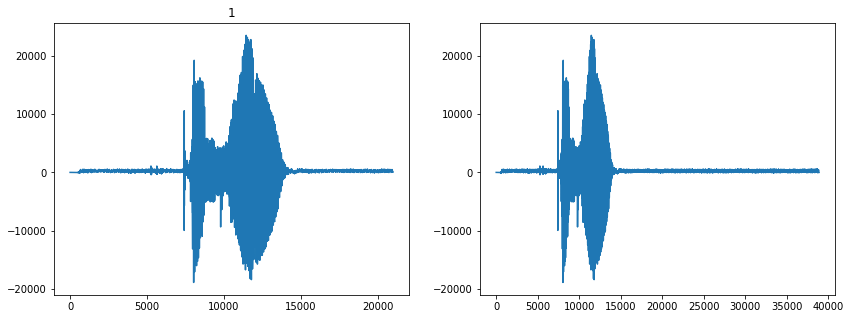

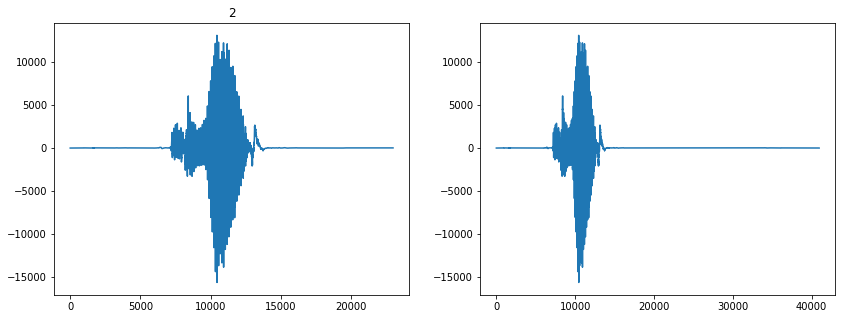

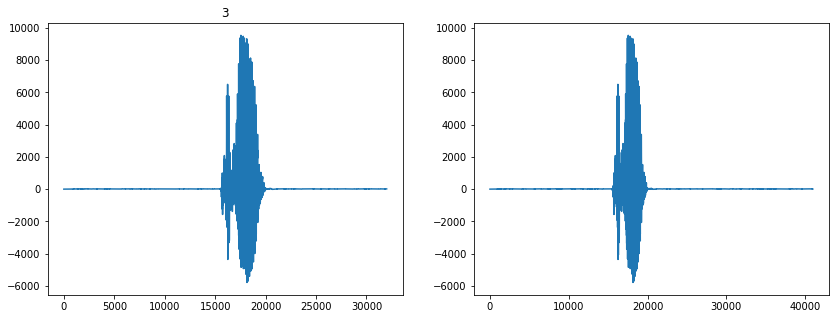

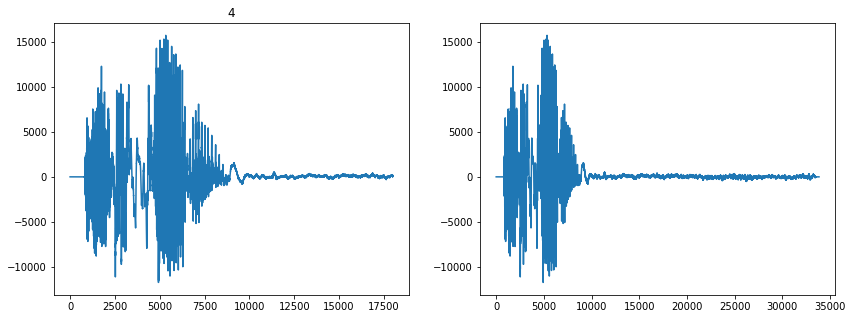

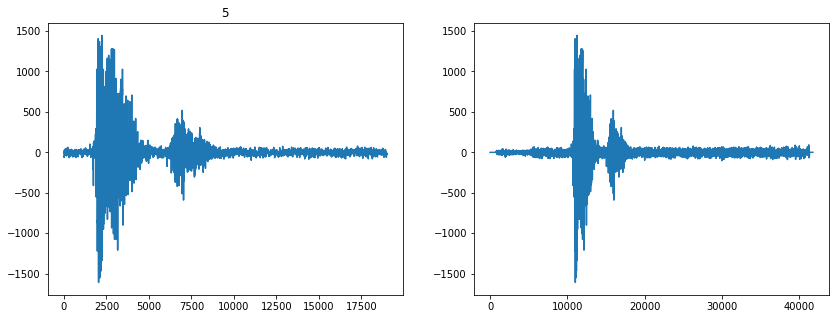

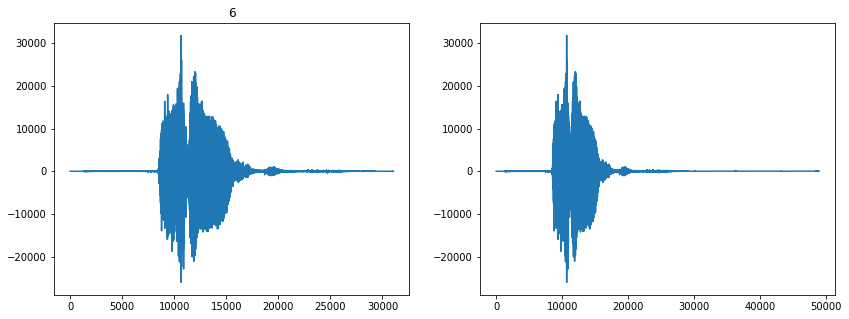

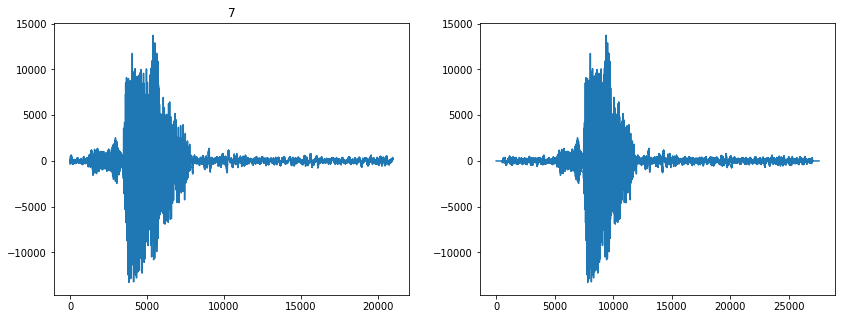

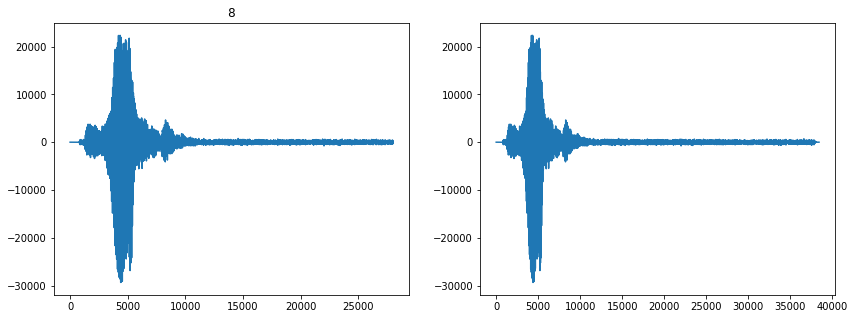

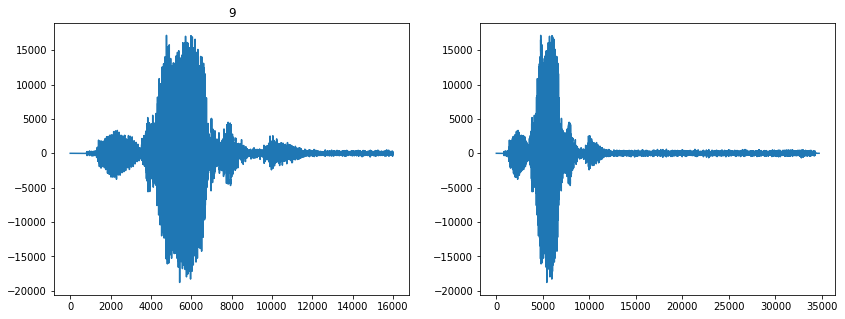

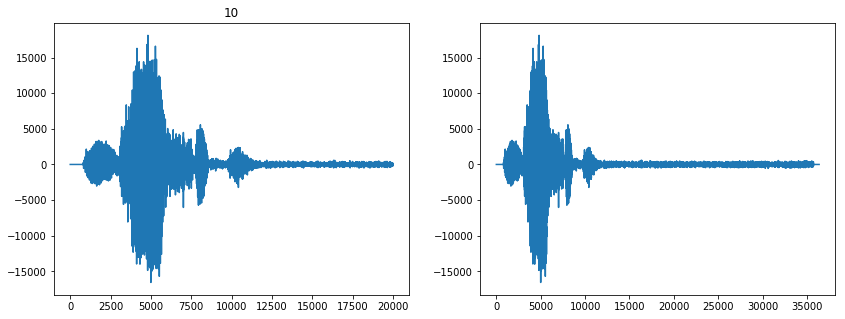

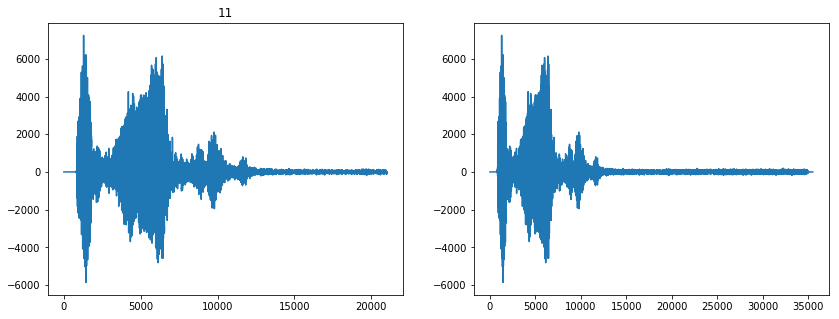

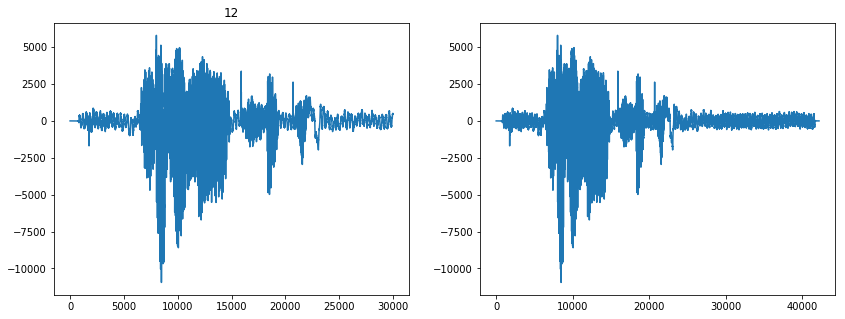

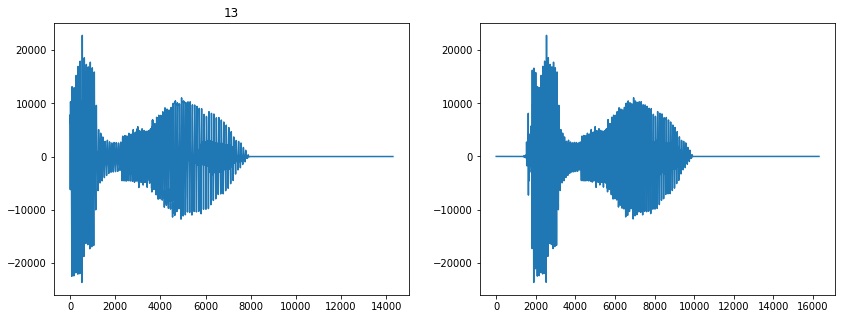

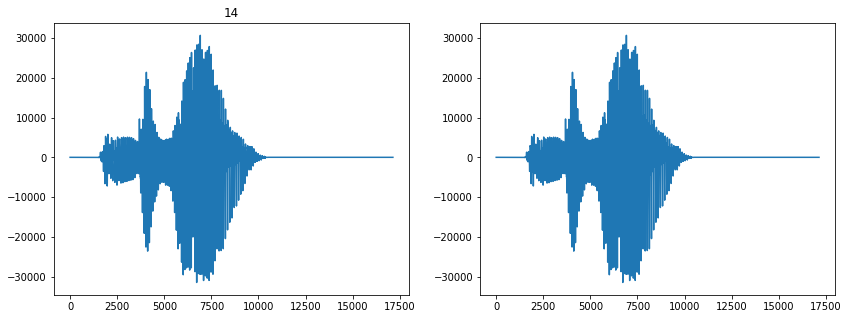

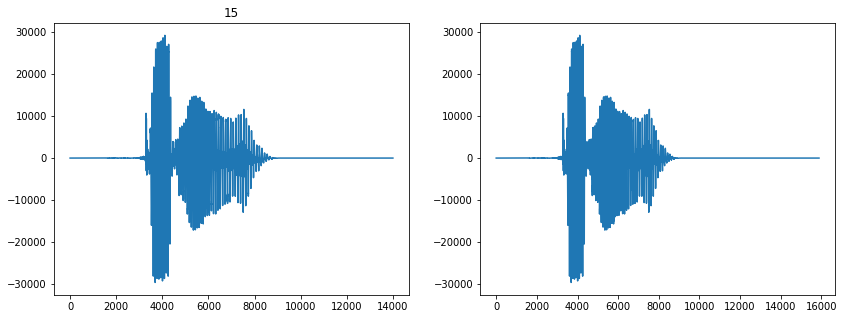

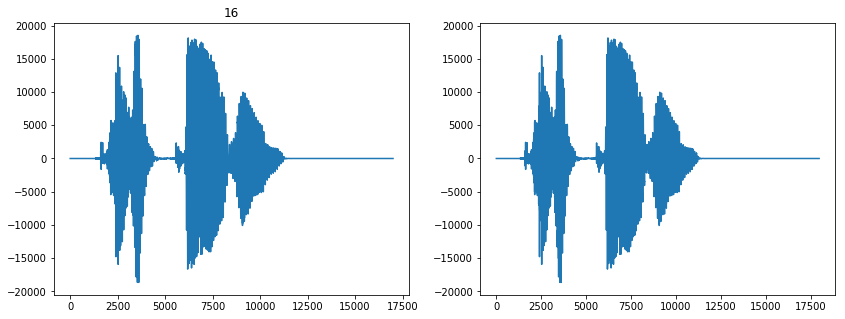

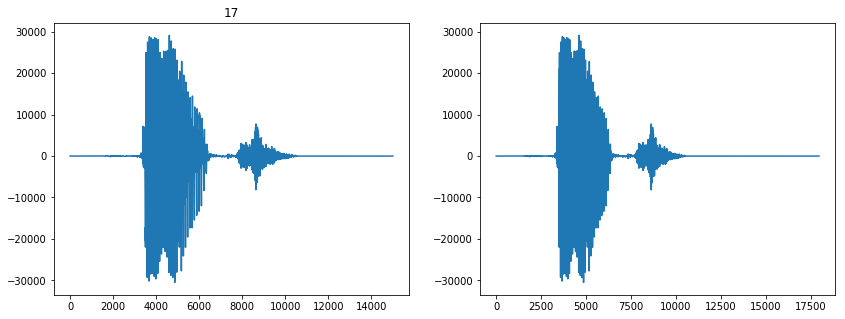

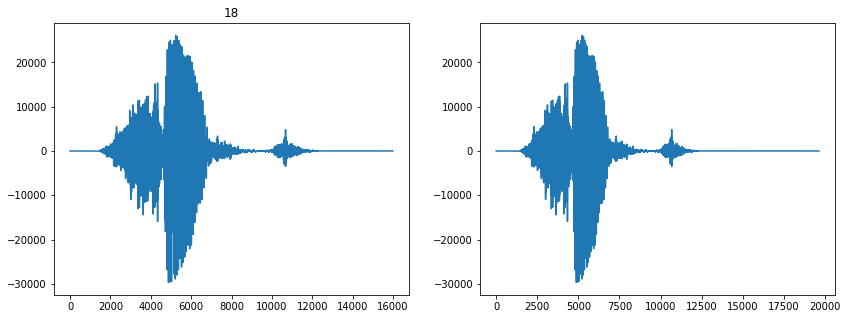

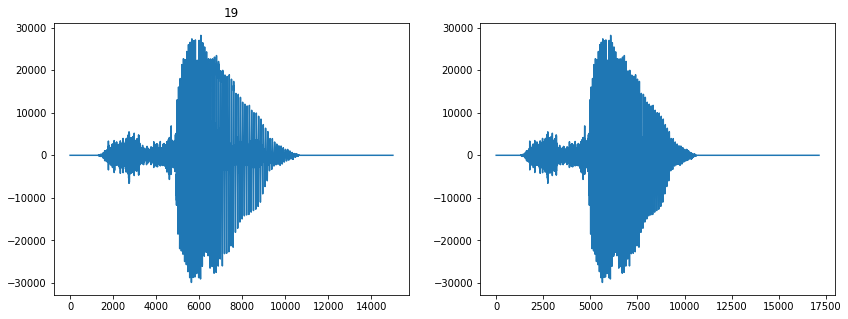

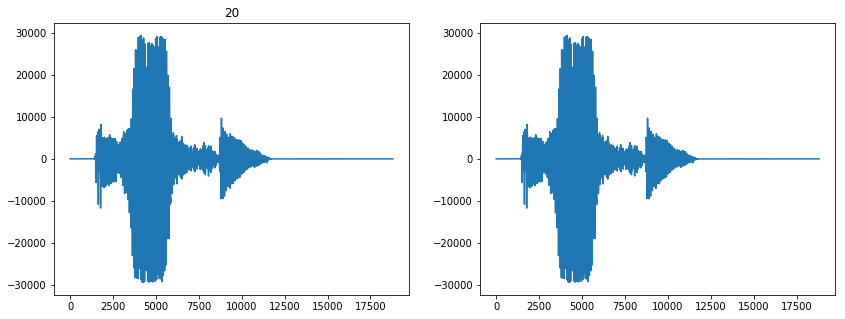

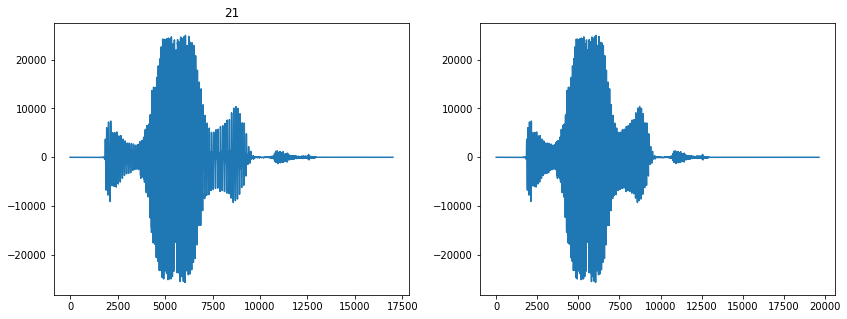

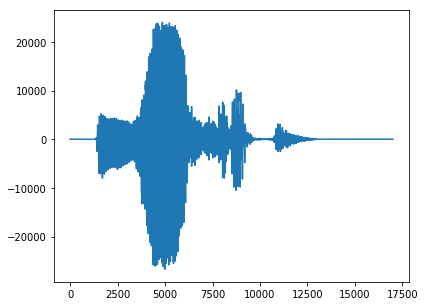

In [35]:
for i, file in enumerate(lst):
    # print(file)
    plt.figure(figsize=(14,5))
    fs, data = wavfile.read(file)
    
    # use only one channel
    if len(data.shape) > 1:        
        data = data[:, 0]
    st, fn = trim(data)
    plt.subplot(1,2,1)
    plt.plot(data[st:fn])
    plt.title(l[i])
    plt.subplot(1,2,2)
    #plt.plot(savgol_filter(data[st:fn], 7, 1))
    plt.plot(data)
    

In [36]:
from scipy import signal

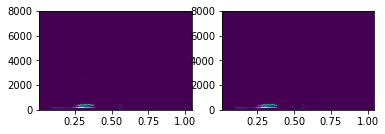

In [37]:
plt.figure(1)
plt.subplot(221)
f, t, Sxx = signal.spectrogram(data[st:fn], fs)
plt.pcolormesh(t, f, Sxx)
plt.subplot(222)
f, t, Sxx = signal.spectrogram(savgol_filter(data[st:fn], 7, 1), fs)
plt.pcolormesh(t, f, Sxx)

In [38]:
import librosa.display

In [39]:
import librosa.effects

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


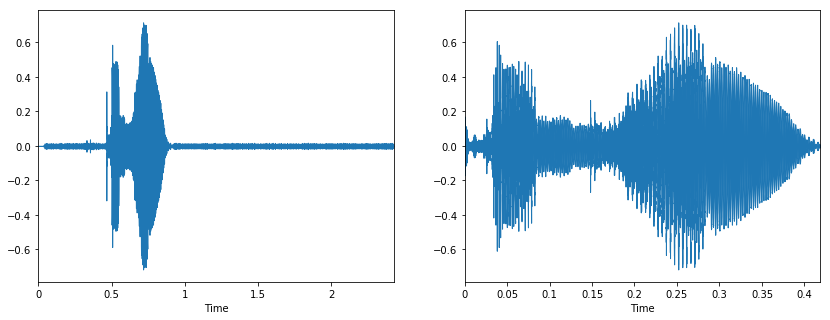

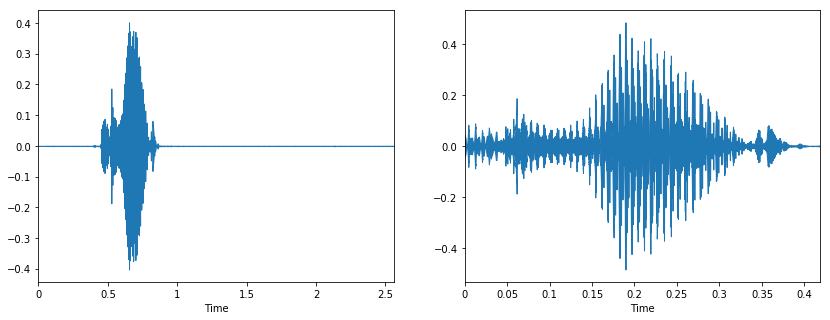

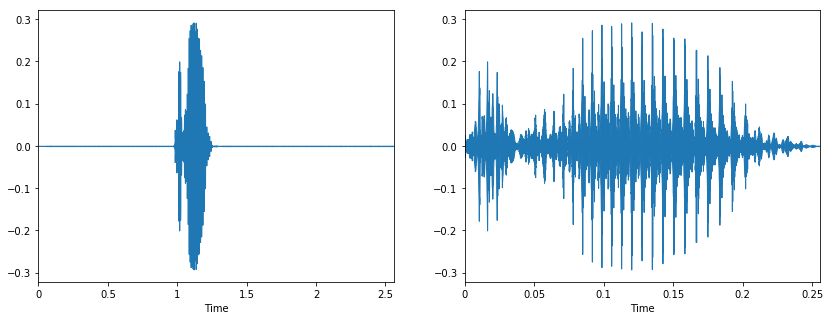

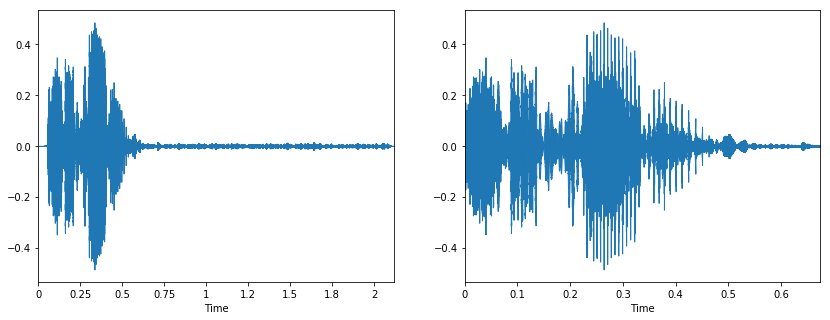

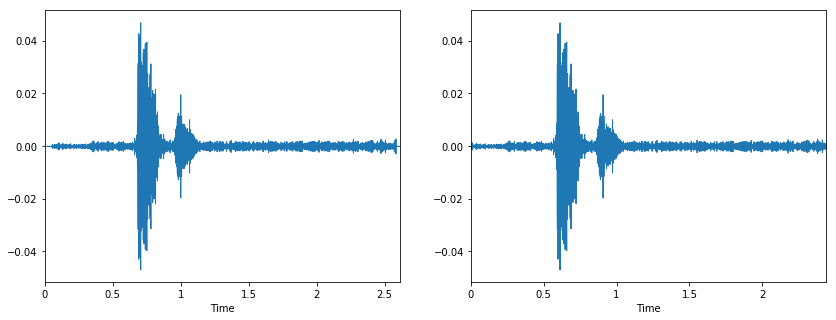

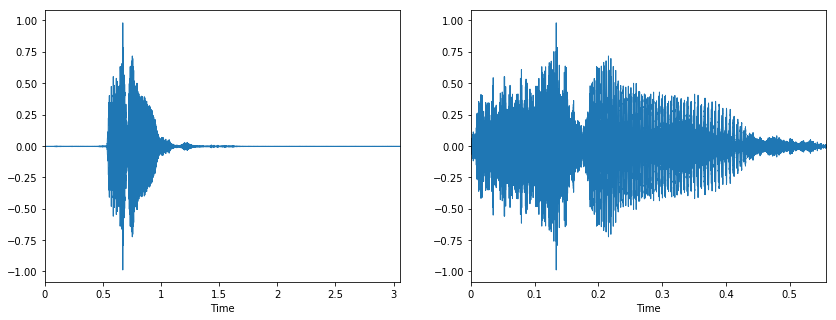

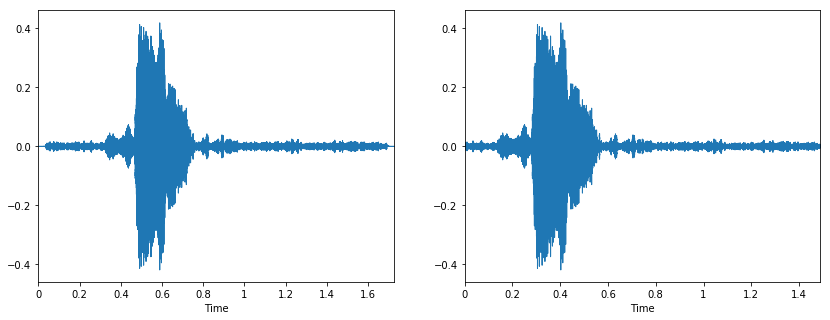

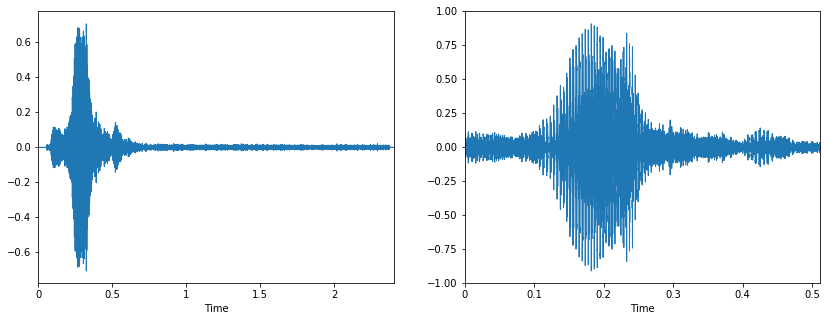

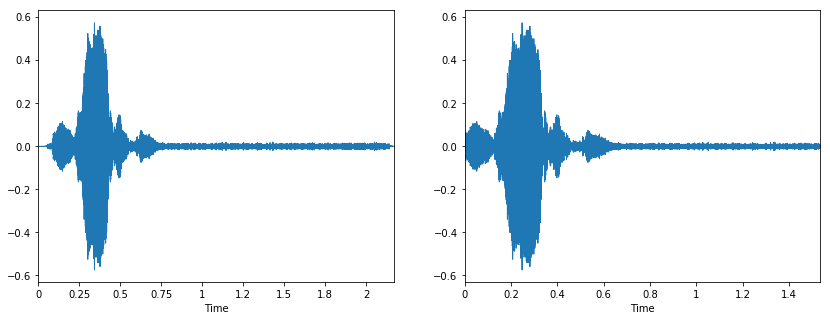

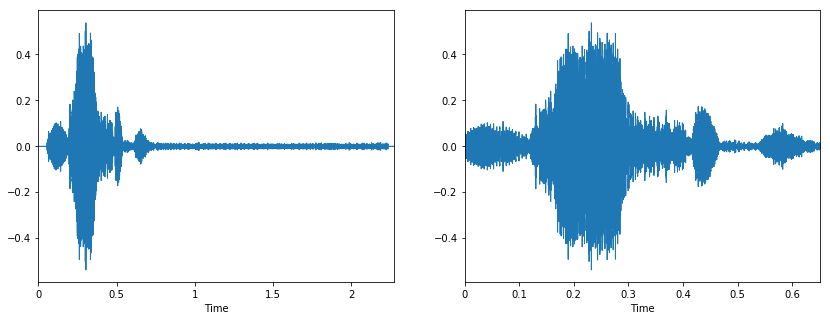

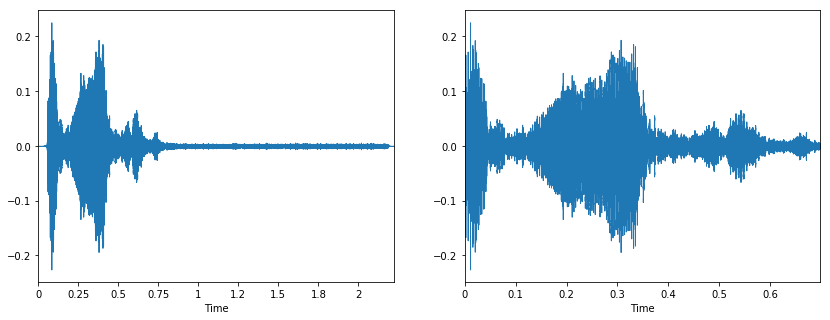

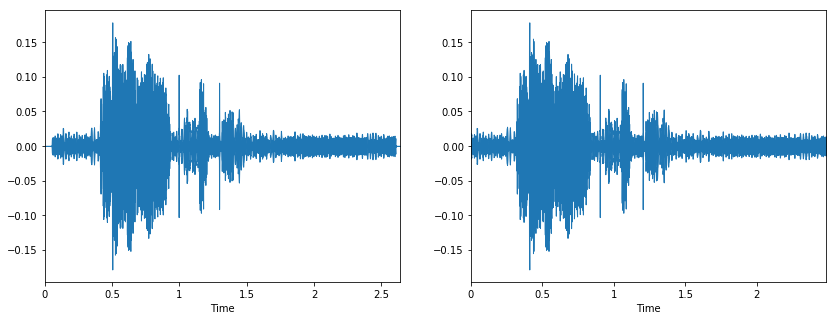

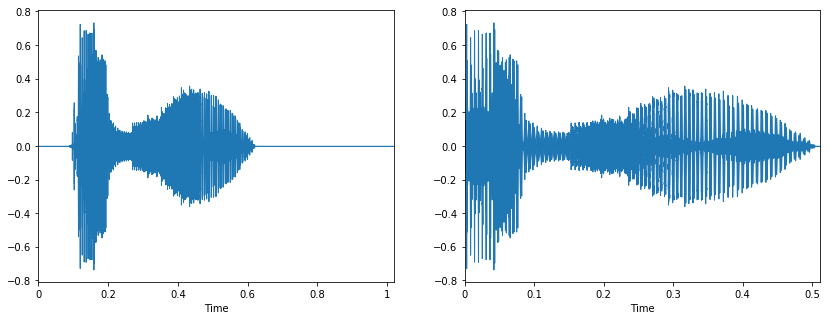

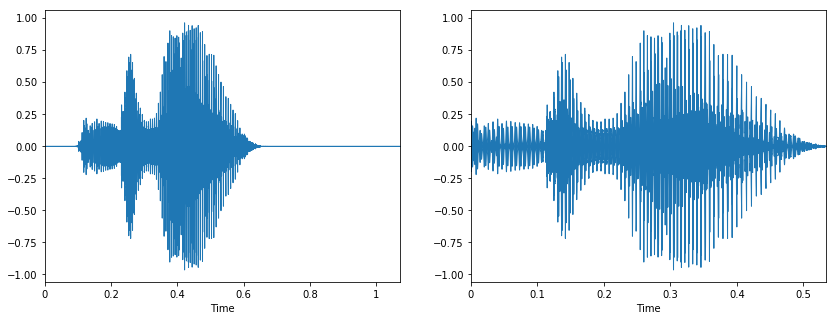

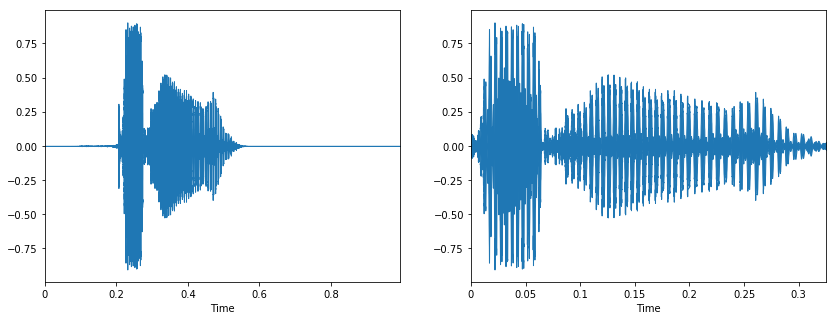

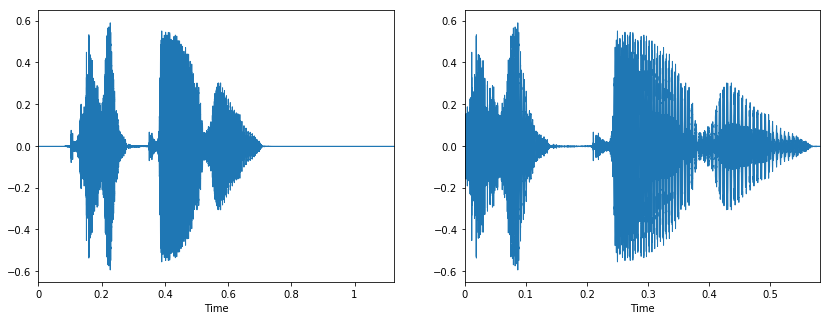

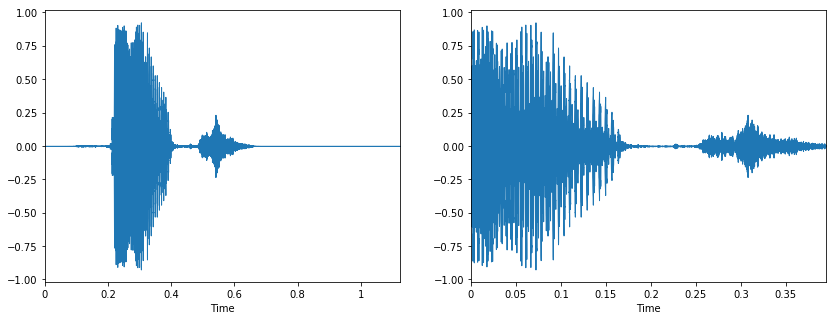

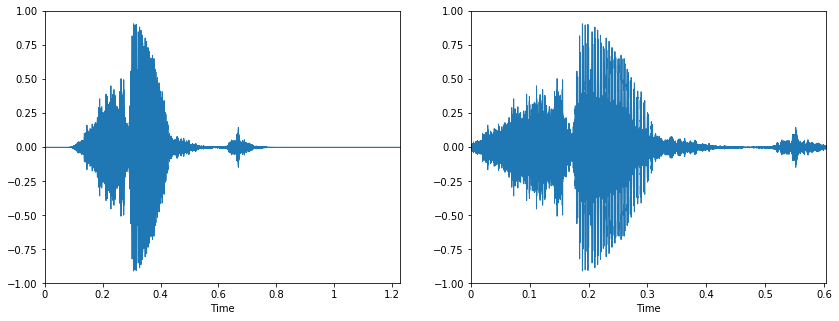

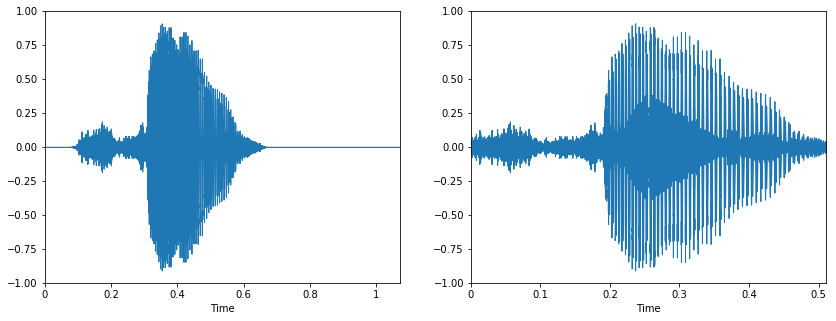

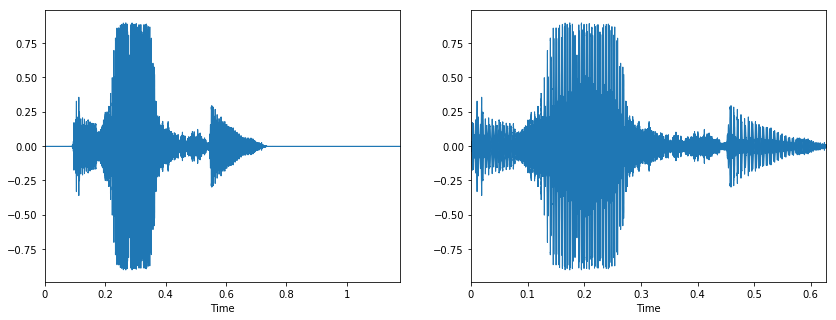

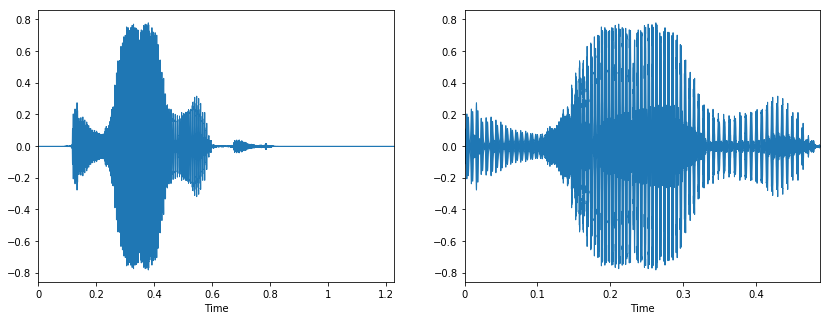

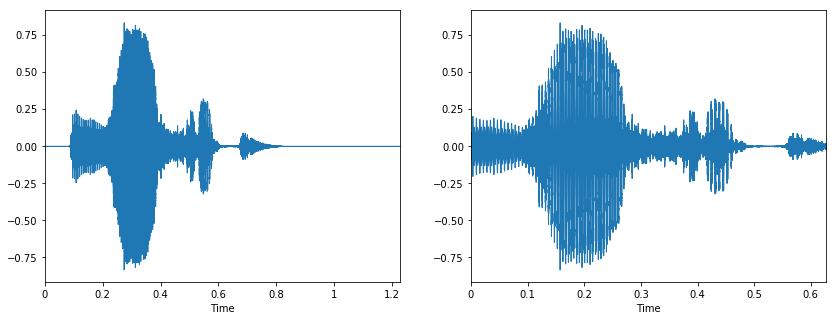

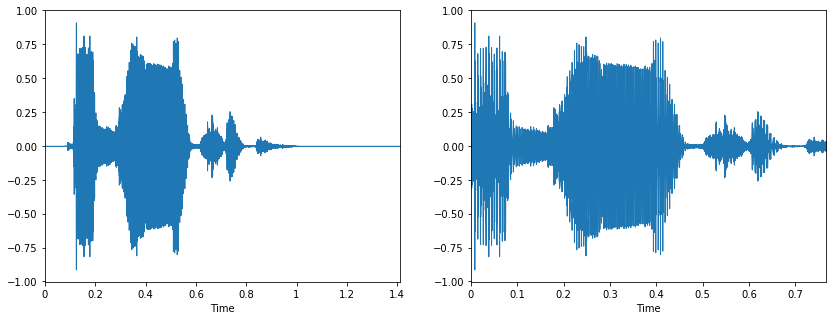

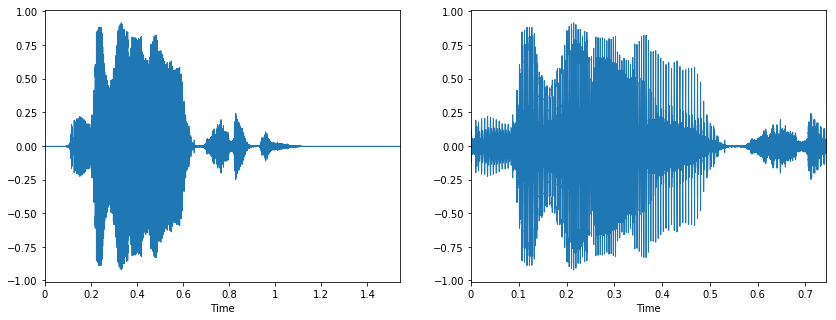

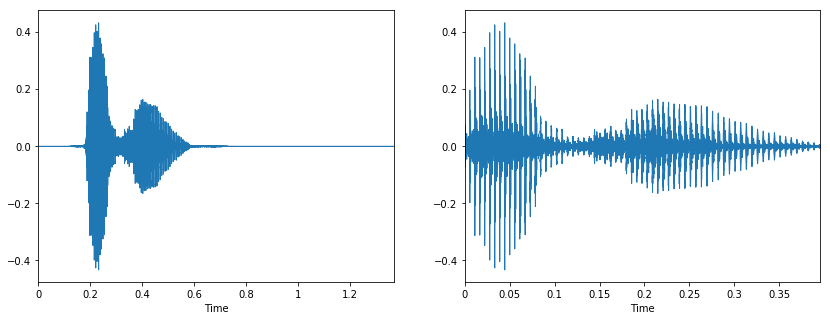

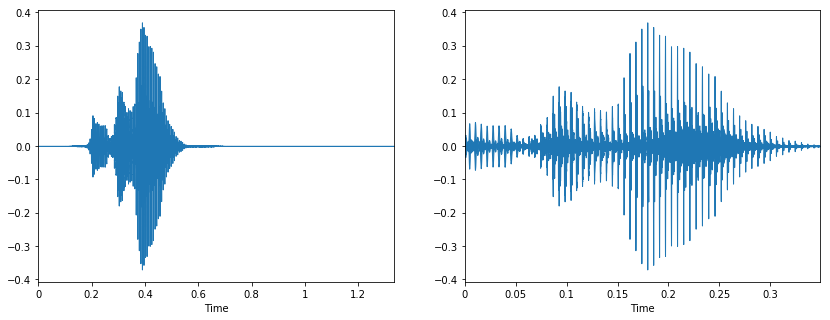

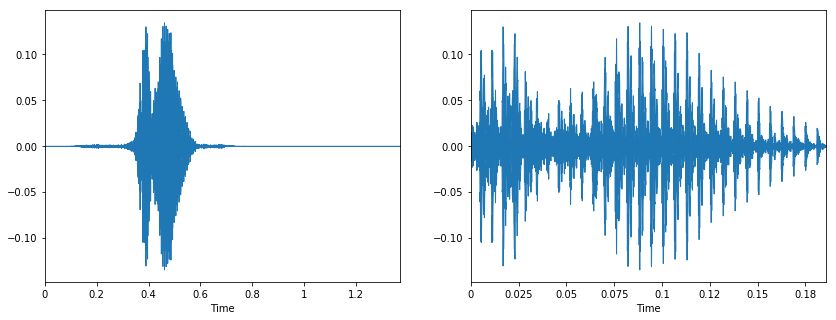

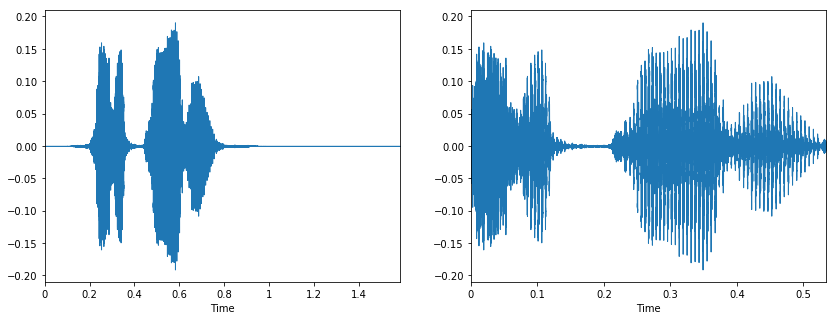

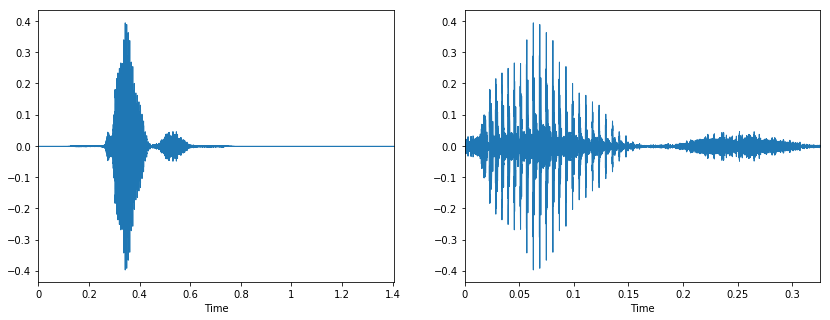

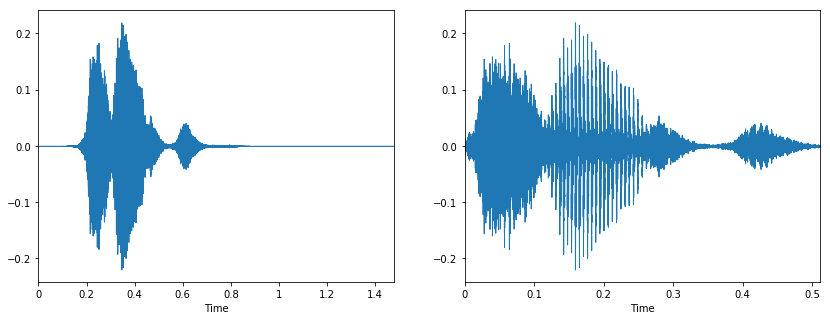

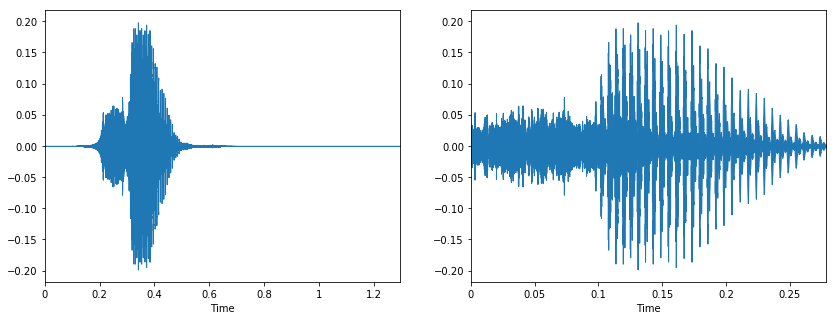

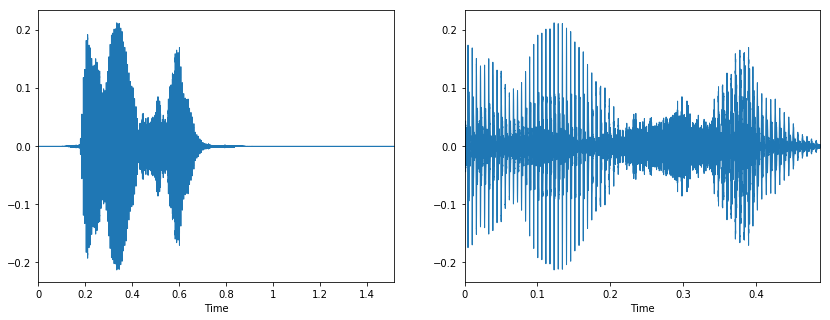

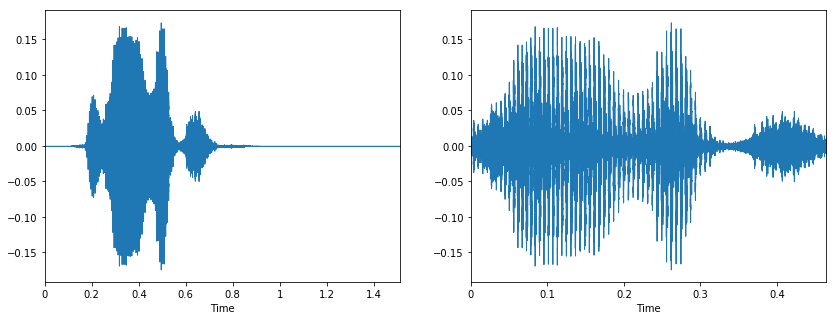

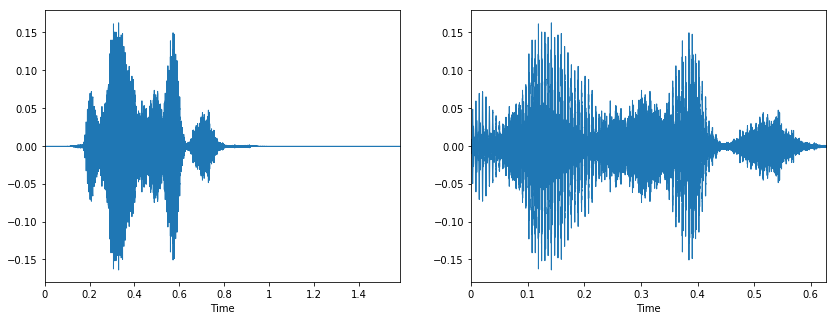

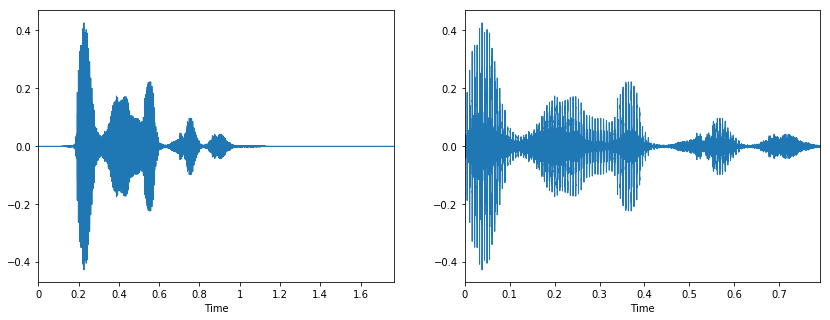

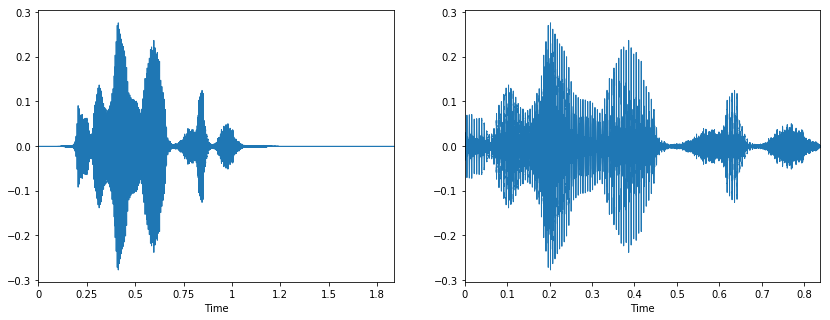

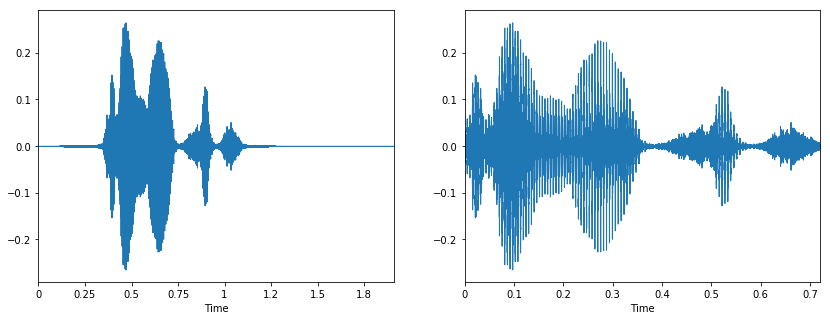

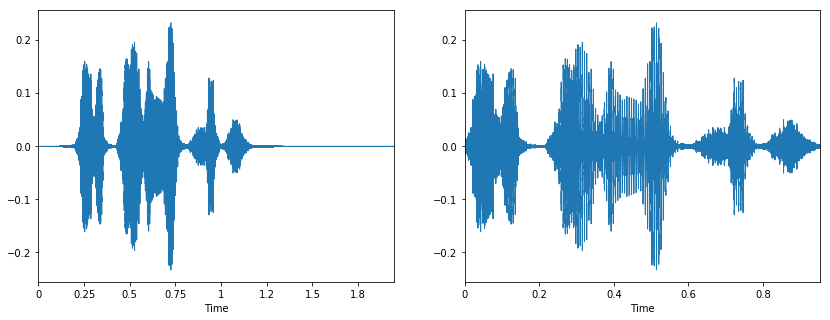

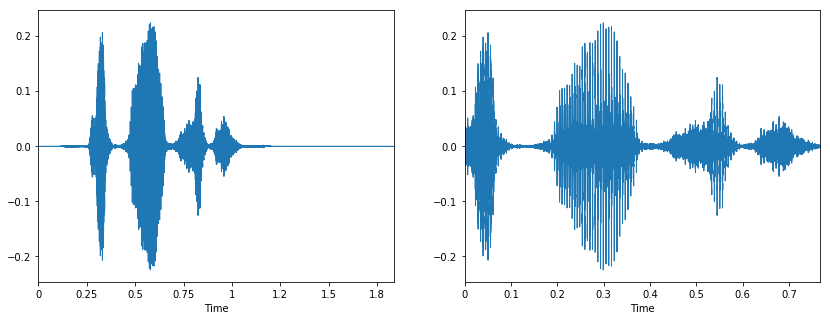

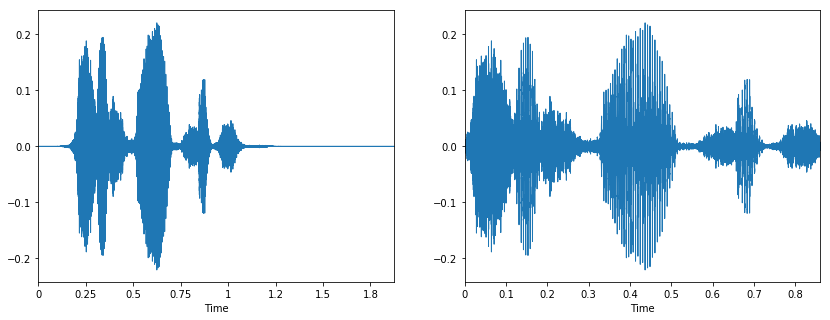

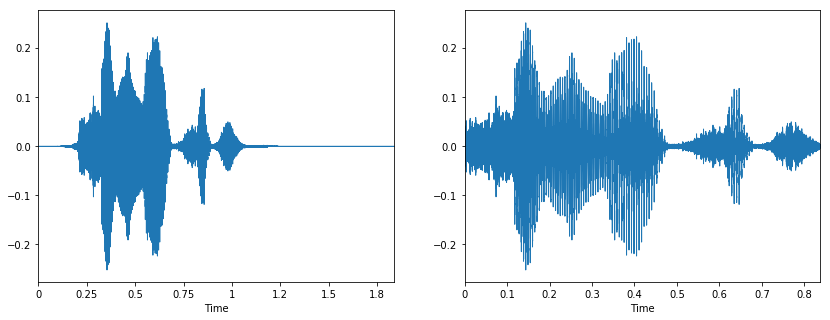

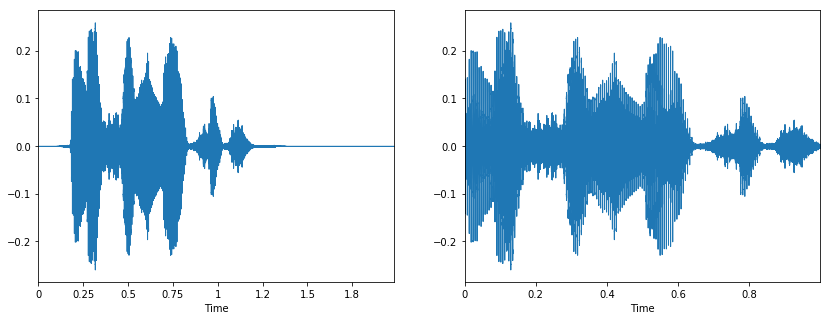

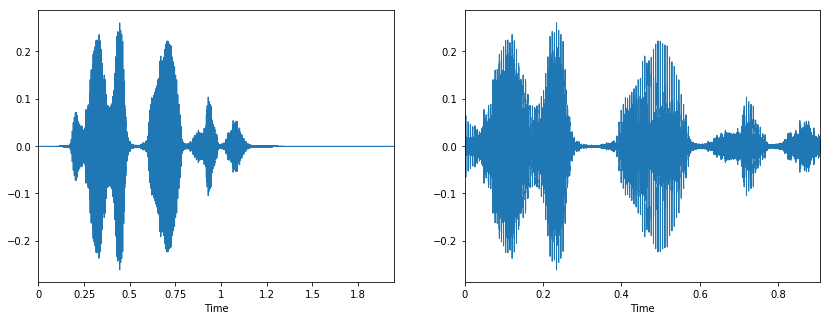

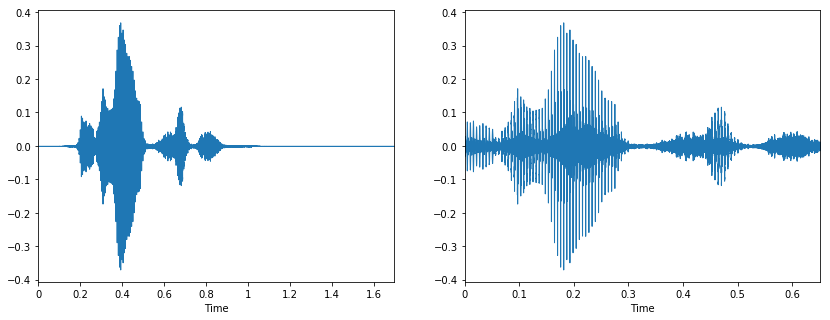

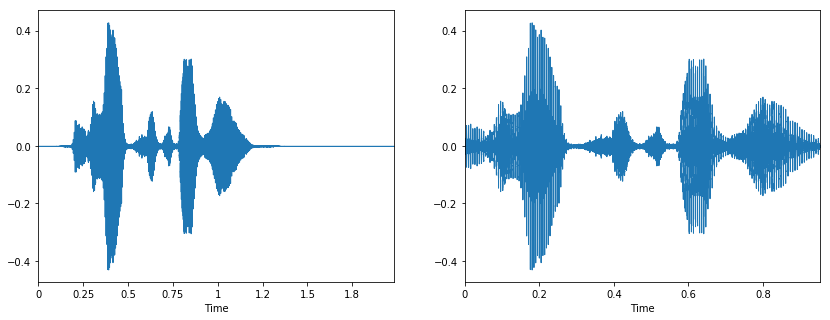

In [40]:
for i, file in enumerate(lst):
    # print(file)
    plt.figure(figsize=(14,5))
    data, fs = librosa.load(file)
    plt.subplot(121)
    librosa.display.waveplot(data)
    trimed, index = librosa.effects.trim(data,top_db=29, frame_length=10)
    plt.subplot(122)
    librosa.display.waveplot(trimed)